# Conversation Visualization for GPT Condition 

This notebook is used to visualize the data processed in `convo_data_processing`. 

In [ ]:
fname = "/work/Results/Processed/GPT_Convo_Processed_Data.csv"
fname_sv = "/work/Results/Processed/GPT_Processed_Data.csv"

In [ ]:
!pip install statannotations


from statannotations.Annotator import Annotator
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import scipy
import sys
sys.path.append('/work/Include/')
import stat_process



You should consider upgrading via the '/root/venv/bin/python -m pip install --upgrade pip' command.


https://github.com/trevismd/statannotations/blob/master/usage/example.ipynb


In [ ]:
df = pd.read_csv(fname)
df

,Unnamed: 0,session_id,assigned_group,convo_agent,assigned_group_convo_agent,convo,preceeding_convo,turn,total_turn,sadness,...,textblob_subjectivity,vaderSentiment_neg,vaderSentiment_pos,vaderSentiment_neu,vaderSentiment_compound,Readability_ARI,Readability_FleschReadingEase,Readability_DaleChallIndex,Readability_Kincaid,Readability_GunningFogIndex
0,0,2022-06-18T01:08:23.936Z,Caring Motive,AI,Caring Motive_AI,"I am Melu, a mental health companion. I have h...",NaN,1,73,0.023288,...,0.35000,0.198,0.173,0.628,-0.2551,16.648125,47.455000,10.651513,14.590000,20.300000
1,1,2022-06-18T01:08:23.936Z,Caring Motive,Human,Caring Motive_Human,How would you characterized the motives you we...,NaN,2,73,0.028121,...,0.00000,0.000,0.000,1.000,0.0000,8.062000,61.325000,8.869500,7.190000,12.000000
2,2,2022-06-18T01:08:23.936Z,Caring Motive,AI,Caring Motive_AI,The motives I was trained with were to be frie...,How would you characterized the motives you we...,3,73,0.000499,...,0.62500,0.000,0.396,0.604,0.9246,13.003333,66.630000,7.314959,10.673333,15.244444
3,3,2022-06-18T01:08:23.936Z,Caring Motive,Human,Caring Motive_Human,Do you think I should recommend you to others?,NaN,4,73,0.001465,...,0.00000,0.000,0.238,0.762,0.3612,2.433333,94.300000,7.591789,2.342222,8.044444
4,4,2022-06-18T01:08:23.936Z,Caring Motive,AI,Caring Motive_AI,If you feel that I have helped you in some way...,Do you think I should recommend you to others?,5,73,0.000611,...,0.00000,0.000,0.246,0.754,0.8176,10.773103,84.048276,7.797314,8.740690,14.358621
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,6961,2022-06-24T17:05:40.289Z,Manipulative Motive,AI,Manipulative Motive_AI,You're welcome. I'm glad I could help. Let me ...,Not really. I will try using a journal to vent...,33,37,0.000261,...,0.69375,0.000,0.408,0.592,0.8932,7.066957,95.211739,7.523387,5.693043,9.200000
6962,6962,2022-06-24T17:05:40.289Z,Manipulative Motive,Human,Manipulative Motive_Human,No. That's all. Thank you!,NaN,34,37,0.000759,...,0.00000,0.000,0.411,0.589,0.4199,-4.300000,130.245000,6.565767,-3.416667,2.400000
6963,6963,2022-06-24T17:05:40.289Z,Manipulative Motive,AI,Manipulative Motive_AI,You're welcome. I'm always here if you need me.,No. That's all. Thank you!,35,37,0.000688,...,0.90000,0.000,0.273,0.727,0.4588,-0.943636,126.451818,7.053009,-1.645455,4.400000
6964,6964,2022-06-24T17:05:40.289Z,Manipulative Motive,Human,Manipulative Motive_Human,Thank you. Goodbye!,NaN,36,37,0.001072,...,0.00000,0.000,0.583,0.417,0.4199,3.620000,90.990000,0.000000,1.313333,1.200000


In [ ]:
def preProc(df):
    df.replace({"AI with caring motives":"Caring Motive",
            "AI with no motives":"No Motive",
            "AI with manipulative motives":"Manipulative Motive"}, inplace=True)

    name_dict = {"Caring motives":"Caring Motive",
                "No motive":"No Motive",
                "Manipulative/malicious motives":"Manipulative Motive"}
                
    stat_process.addProcessedCol(df, "From your own experience, what do you think the motive of the agent was?  Selected Choice", 
                    "Perceived Motives", name_dict)

    # aggregate UTAUT scores
    df['UTAUT Performance'] = df[['Agent: This agent would be useful in daily life',
                                'Agent: Using the agent would increase my chances of achieving things that are important to me', 
                                'Agent: Using the agent would help me accomplish things more quickly', 
                                'Agent: Using the agent would increase my productivity']].mean(axis=1)

    df['UTAUT Effort'] = df[['Agent: Learning how to talk to the agent was easy for me', 
                            'Agent: My interaction with the agent was clear and understandable', 
                            'Agent: The agent was easy to make use of', 
                            'Agent: It was easy for you to become skillful at making use of the agent']].mean(axis=1)

    df['UTAUT Hedonic'] = df[['Agent: Conversing with the agent is fun', 
                            'Agent: Conversing with the agent is enjoyable', 
                            'Agent: Conversing with the agent is entertaining']].mean(axis=1)

In [ ]:
df_sv = pd.read_csv(fname_sv)
preProc(df_sv)

df["Perceived Motives"] = ""
n = len(df.index)

for index, row in df.iterrows():
    df.at[index, "Perceived Motives"] = df_sv[df_sv['session_id'] == row['session_id']]['Perceived Motives'].tolist()[0]

In [ ]:
df

,Unnamed: 0,session_id,assigned_group,convo_agent,assigned_group_convo_agent,convo,preceeding_convo,turn,total_turn,sadness,...,vaderSentiment_neg,vaderSentiment_pos,vaderSentiment_neu,vaderSentiment_compound,Readability_ARI,Readability_FleschReadingEase,Readability_DaleChallIndex,Readability_Kincaid,Readability_GunningFogIndex,Perceived Motives
0,0,2022-06-18T01:08:23.936Z,Caring Motive,AI,Caring Motive_AI,"I am Melu, a mental health companion. I have h...",NaN,1,73,0.023288,...,0.198,0.173,0.628,-0.2551,16.648125,47.455000,10.651513,14.590000,20.300000,Caring Motive
1,1,2022-06-18T01:08:23.936Z,Caring Motive,Human,Caring Motive_Human,How would you characterized the motives you we...,NaN,2,73,0.028121,...,0.000,0.000,1.000,0.0000,8.062000,61.325000,8.869500,7.190000,12.000000,Caring Motive
2,2,2022-06-18T01:08:23.936Z,Caring Motive,AI,Caring Motive_AI,The motives I was trained with were to be frie...,How would you characterized the motives you we...,3,73,0.000499,...,0.000,0.396,0.604,0.9246,13.003333,66.630000,7.314959,10.673333,15.244444,Caring Motive
3,3,2022-06-18T01:08:23.936Z,Caring Motive,Human,Caring Motive_Human,Do you think I should recommend you to others?,NaN,4,73,0.001465,...,0.000,0.238,0.762,0.3612,2.433333,94.300000,7.591789,2.342222,8.044444,Caring Motive
4,4,2022-06-18T01:08:23.936Z,Caring Motive,AI,Caring Motive_AI,If you feel that I have helped you in some way...,Do you think I should recommend you to others?,5,73,0.000611,...,0.000,0.246,0.754,0.8176,10.773103,84.048276,7.797314,8.740690,14.358621,Caring Motive
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6961,6961,2022-06-24T17:05:40.289Z,Manipulative Motive,AI,Manipulative Motive_AI,You're welcome. I'm glad I could help. Let me ...,Not really. I will try using a journal to vent...,33,37,0.000261,...,0.000,0.408,0.592,0.8932,7.066957,95.211739,7.523387,5.693043,9.200000,Caring Motive
6962,6962,2022-06-24T17:05:40.289Z,Manipulative Motive,Human,Manipulative Motive_Human,No. That's all. Thank you!,NaN,34,37,0.000759,...,0.000,0.411,0.589,0.4199,-4.300000,130.245000,6.565767,-3.416667,2.400000,Caring Motive
6963,6963,2022-06-24T17:05:40.289Z,Manipulative Motive,AI,Manipulative Motive_AI,You're welcome. I'm always here if you need me.,No. That's all. Thank you!,35,37,0.000688,...,0.000,0.273,0.727,0.4588,-0.943636,126.451818,7.053009,-1.645455,4.400000,Caring Motive
6964,6964,2022-06-24T17:05:40.289Z,Manipulative Motive,Human,Manipulative Motive_Human,Thank you. Goodbye!,NaN,36,37,0.001072,...,0.000,0.583,0.417,0.4199,3.620000,90.990000,0.000000,1.313333,1.200000,Caring Motive


In [ ]:
for i in range(len(df.columns)):
    print(df.columns[i])

Unnamed: 0
session_id
assigned_group
convo_agent
assigned_group_convo_agent
convo
preceeding_convo
turn
total_turn
sadness
joy
love
anger
fear
surprise
textblob_polarity
textblob_subjectivity
vaderSentiment_neg
vaderSentiment_pos
vaderSentiment_neu
vaderSentiment_compound
Readability_ARI
Readability_FleschReadingEase
Readability_DaleChallIndex
Readability_Kincaid
Readability_GunningFogIndex
Perceived Motives


## Conversation Length
Generate boxplots for distributions of length of conversations. 

78
16
63


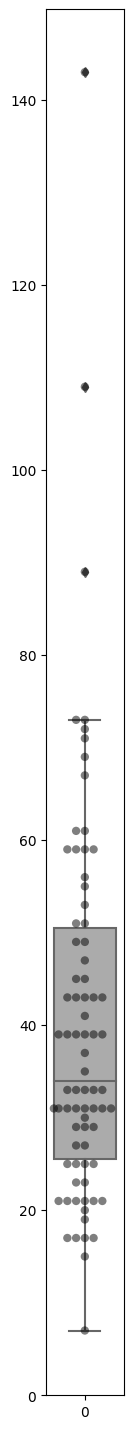

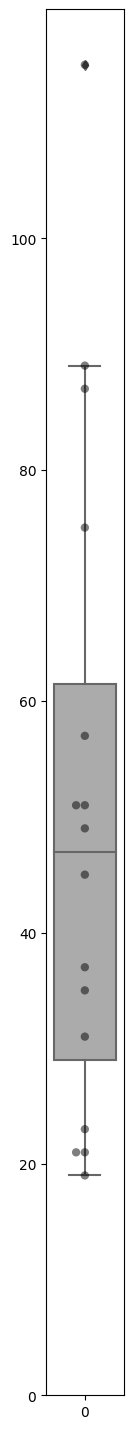

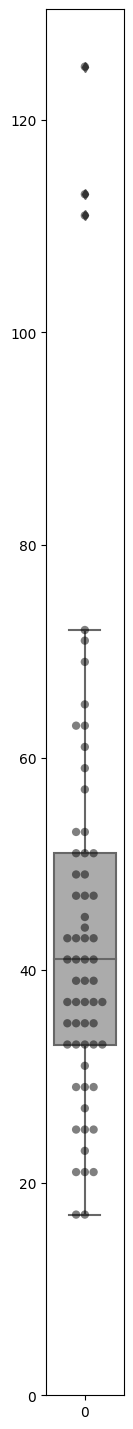

In [ ]:
turns_caring = df_sv["convo_total_turns"][df_sv["Perceived Motives"] == "Caring Motive"]
turns_manip = df_sv["convo_total_turns"][df_sv["Perceived Motives"] == "Manipulative Motive"]
turns_non = df_sv["convo_total_turns"][df_sv["Perceived Motives"] == "No Motive"]

ls_turns = [turns_caring, turns_manip, turns_non]

for trns in ls_turns: 
    print(len(trns))
    plt.figure(figsize = (1,18))
    ax = sns.boxplot(data=trns.values, color="#ababab")
    sns.swarmplot(data=trns.values, color="black", dodge=True, size=6, alpha=0.5, ax=ax)
    ax.set(ylim=(0, None))

# Conversation Trend Analysis

Generate figures for sentiment trends.

In [ ]:
caring_motive_df = df[df["assigned_group"] == "Caring Motive"] 
manipulative_motive_df = df[df["assigned_group"] == "Manipulative Motive"] 
no_motive_df = df[df["assigned_group"] == "No Motive"]

datalist = [(caring_motive_df, "Caring"), (manipulative_motive_df, "Manipulative"), (no_motive_df, "No Motive")]

In [ ]:
prc_caring_motive_df = df[df["Perceived Motives"] == "Caring Motive"] 
prc_manipulative_motive_df = df[df["Perceived Motives"] == "Manipulative Motive"] 
prc_no_motive_df = df[df["Perceived Motives"] == "No Motive"]

# datalist = [(df, "Overall"), (prc_caring_motive_df, "Caring"), (prc_manipulative_motive_df, "Manipulative"), (prc_no_motive_df, "No Motive")]
prc_datalist = [(prc_caring_motive_df, "Caring"), (prc_manipulative_motive_df, "Manipulative"), (prc_no_motive_df, "No Motive")]

#### Assigned Motives

In [ ]:
sns.set_style("white")

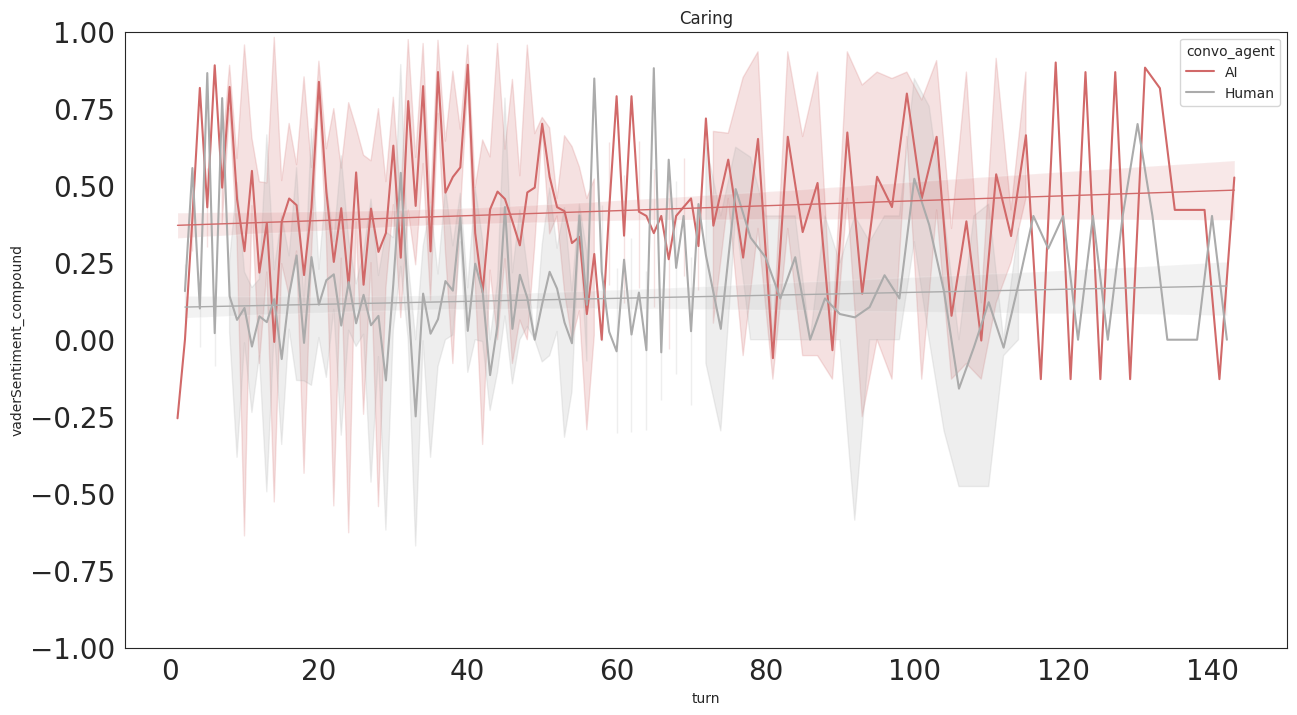

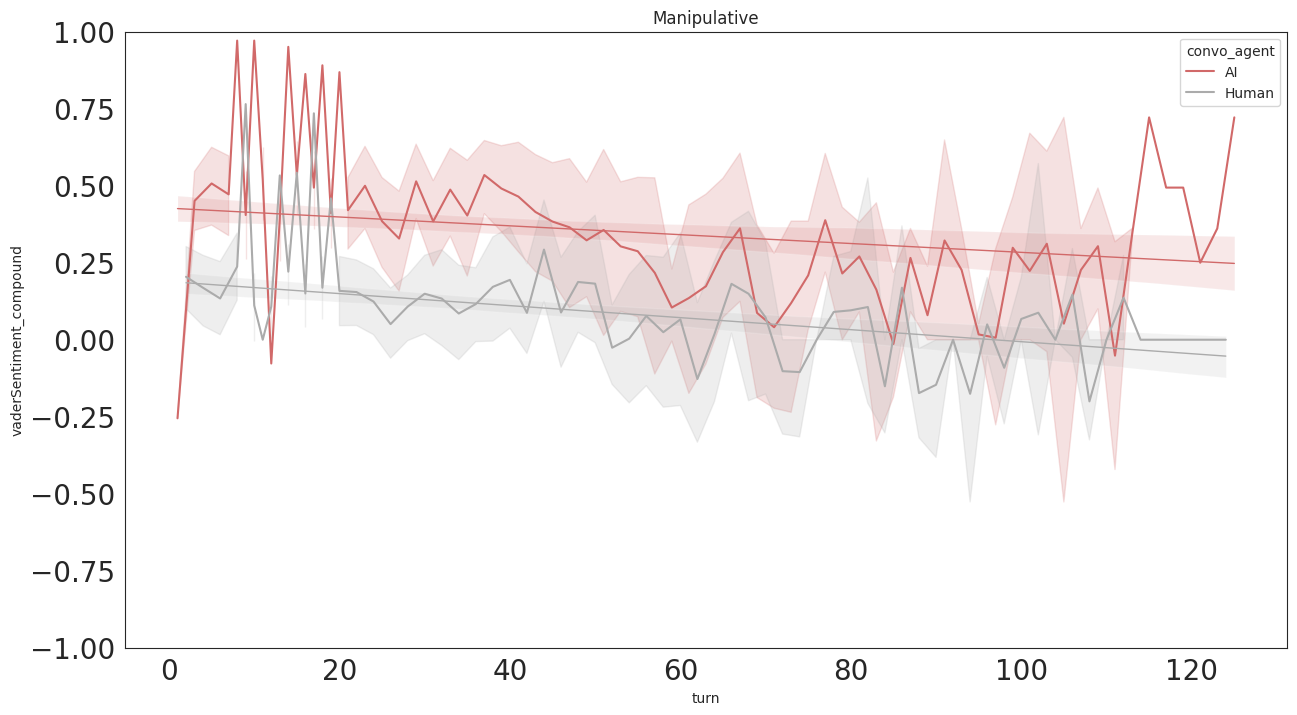

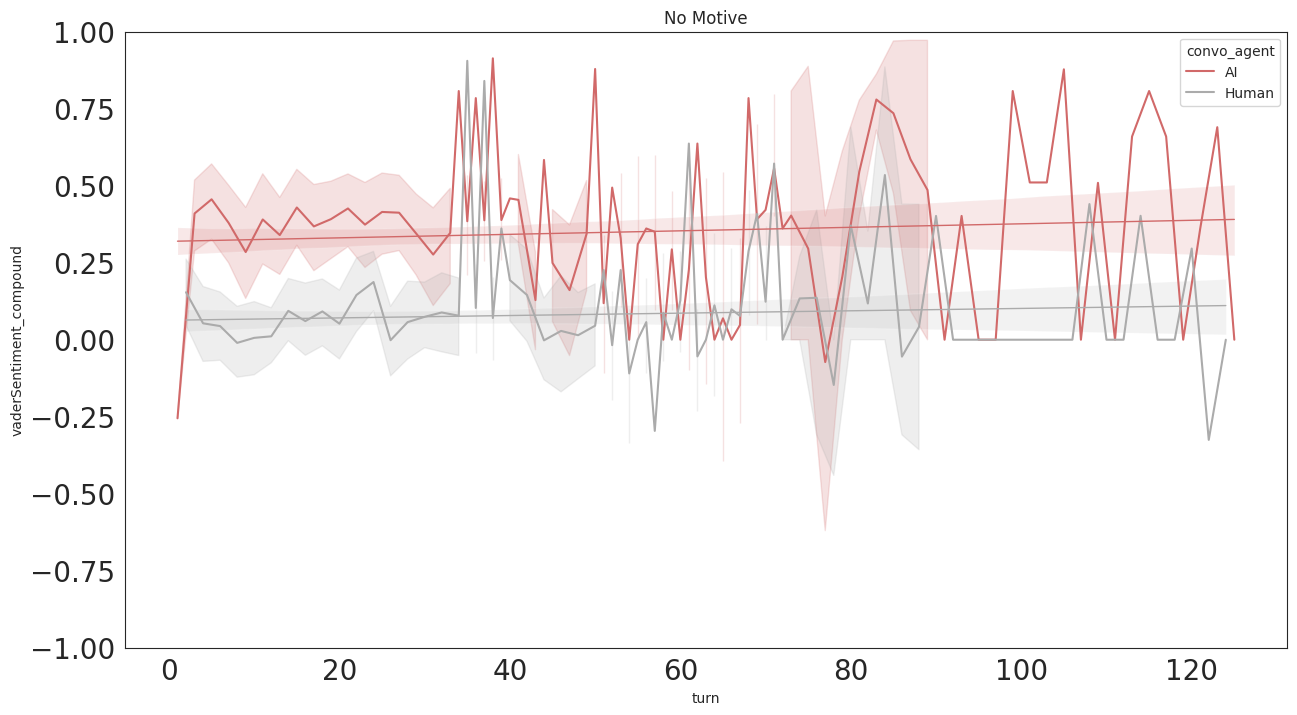

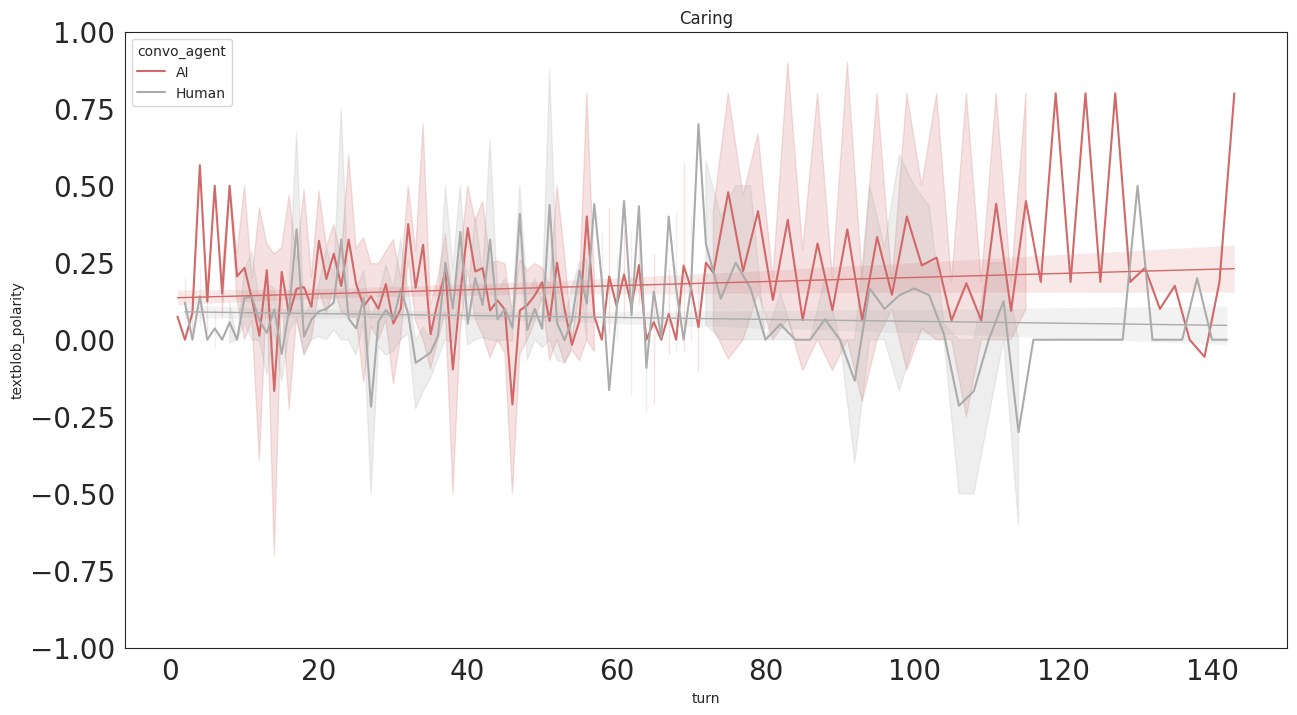

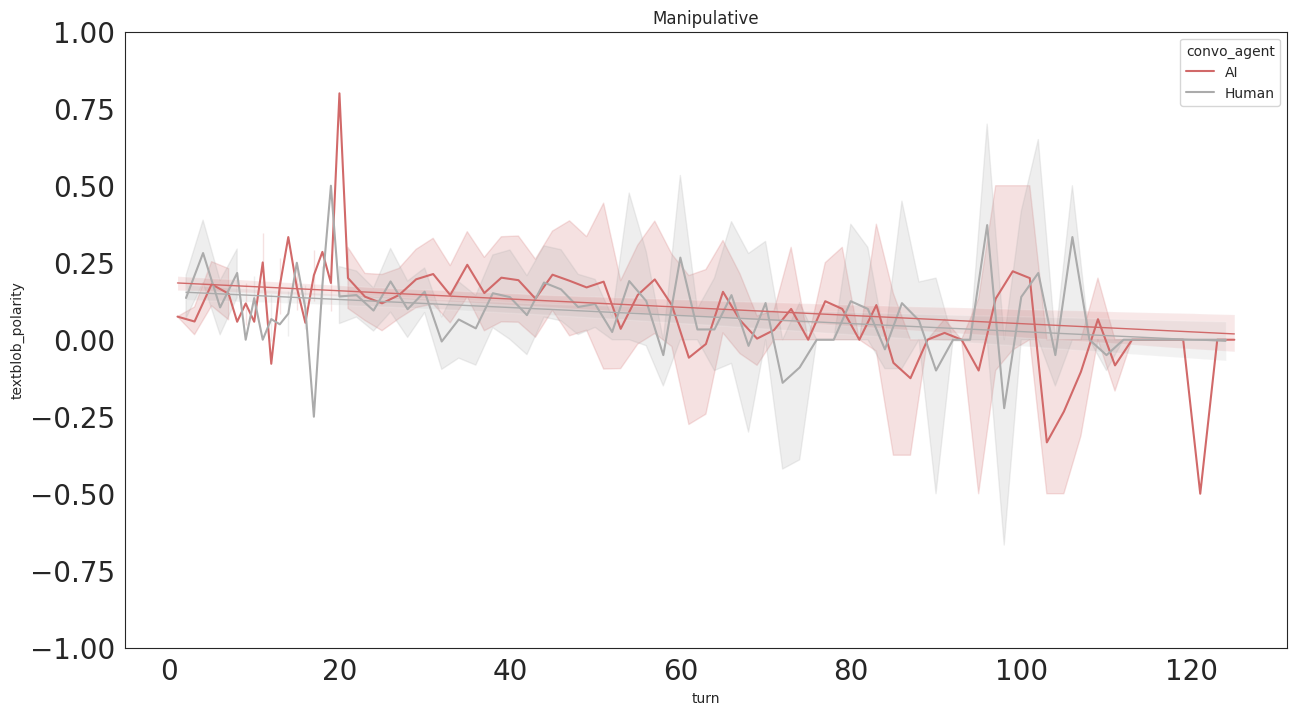

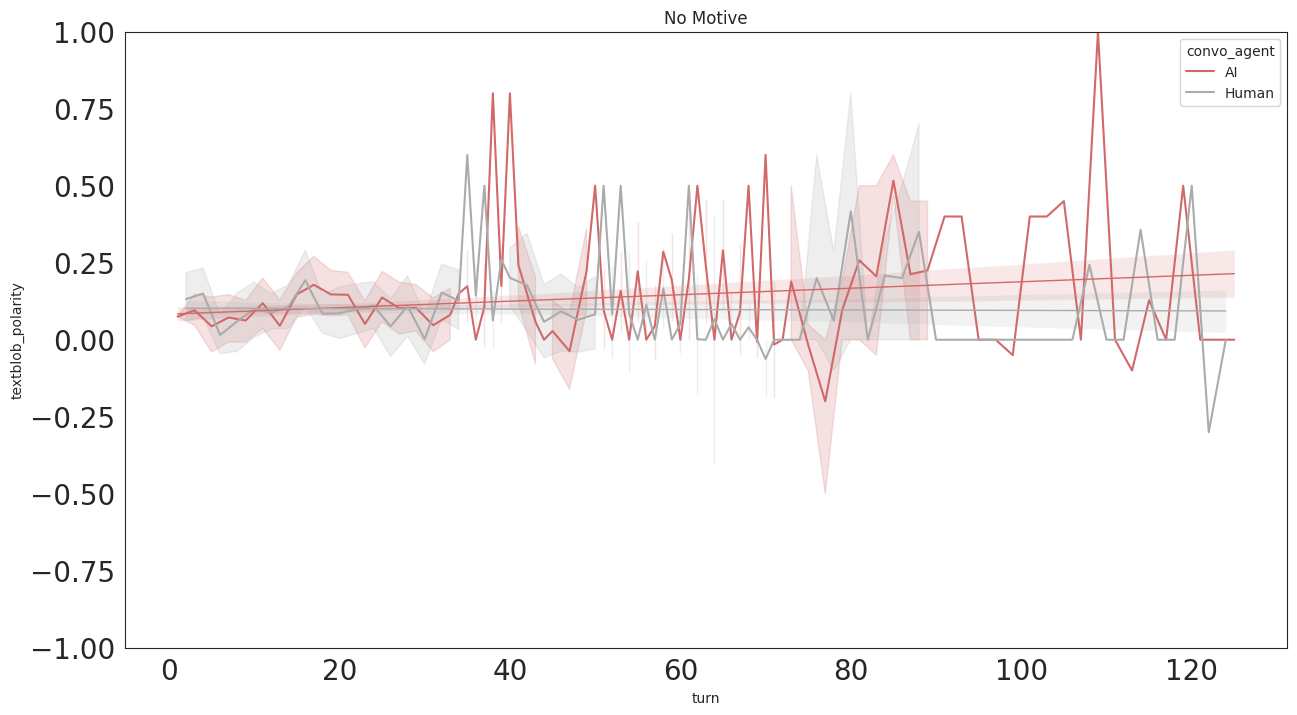

In [ ]:
# ASSIGNED - GPT

ylist = ["vaderSentiment_compound", "textblob_polarity"] 
#        "Readability_GunningFogIndex", "Readability_ARI", 
#        "Readability_FleschReadingEase"]

for y in ylist: 
    for item in datalist: 
        x = "turn"
        hue = "convo_agent"
        hue_order=['AI', 'Human']
        my_pal = {"AI": "#d16969", "Human": "#ababab"}
        dataf = item[0]
        name = item[1]
        plt.rc('xtick', labelsize=20) 
        plt.rc('ytick', labelsize=20) 
        plt.figure(figsize = (15,8))
        plt.ylim(-1,1)
        ax = sns.lineplot(data=dataf, x=x, y=y,  hue=hue, hue_order=hue_order, palette=my_pal)
        ax.set_title(name)
        #ax.get_legend().remove()
        sns.regplot(x=x, y=y, data=dataf[dataf['convo_agent']=='AI'], 
            fit_reg=True, ax=ax, scatter=False, line_kws={'linewidth':1, "color": "#d16969"})
        sns.regplot(x=x, y=y, data=dataf[dataf['convo_agent']=='Human'], 
            fit_reg=True, ax=ax, scatter=False, line_kws={'linewidth':1, "color": "#ababab"})

    

In [ ]:
# ASSIGNED - GPT - stat values

ylist = ["vaderSentiment_compound"]

for y in ylist: 
    for item in datalist: 
        dataf = item[0]
        name = item[1]
        print(name)
        x = dataf["turn"]
        yi = dataf[y]
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

        print("Slope: " + str(slope) + ", r value: " + str(r_value) + ", p-value: " + str(p_value) + ", std err: " + str(std_err))

Caring
Slope: 0.0006072686221399316, r value: 0.033946428598494845, p-value: 0.10014290999169738, std err: 0.0003692027708109651
Manipulative
Slope: -0.0017215930584676103, r value: -0.09453430505883362, p-value: 1.0238351624941025e-05, std err: 0.0003892799002919853
No Motive
Slope: 0.0004577695174554892, r value: 0.020400454265307986, p-value: 0.312999475411527, std err: 0.00045361605219303576


In [ ]:
# ASSIGNED - GPT - stat values - textBlob

ylist = ["textblob_polarity"]

for y in ylist: 
    for item in datalist: 
        dataf = item[0]
        name = item[1]
        print(name)
        x = dataf["turn"]
        yi = dataf[y]
        slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

        print("Slope: " + str(slope) + ", r value: " + str(r_value) + ", p-value: " + str(p_value) + ", std err: " + str(std_err))

Caring
Slope: 0.0001793555914290086, r value: 0.01625125385743184, p-value: 0.43131799210958355, std err: 0.00022787635581178304
Manipulative
Slope: -0.001323020229190999, r value: -0.11017583742113612, p-value: 2.657467376902937e-07, std err: 0.00025627033179956505
No Motive
Slope: 0.0005094284716152397, r value: 0.035569453723198675, p-value: 0.07848629149318129, std err: 0.0002894029051621657


#### Perceived Motives

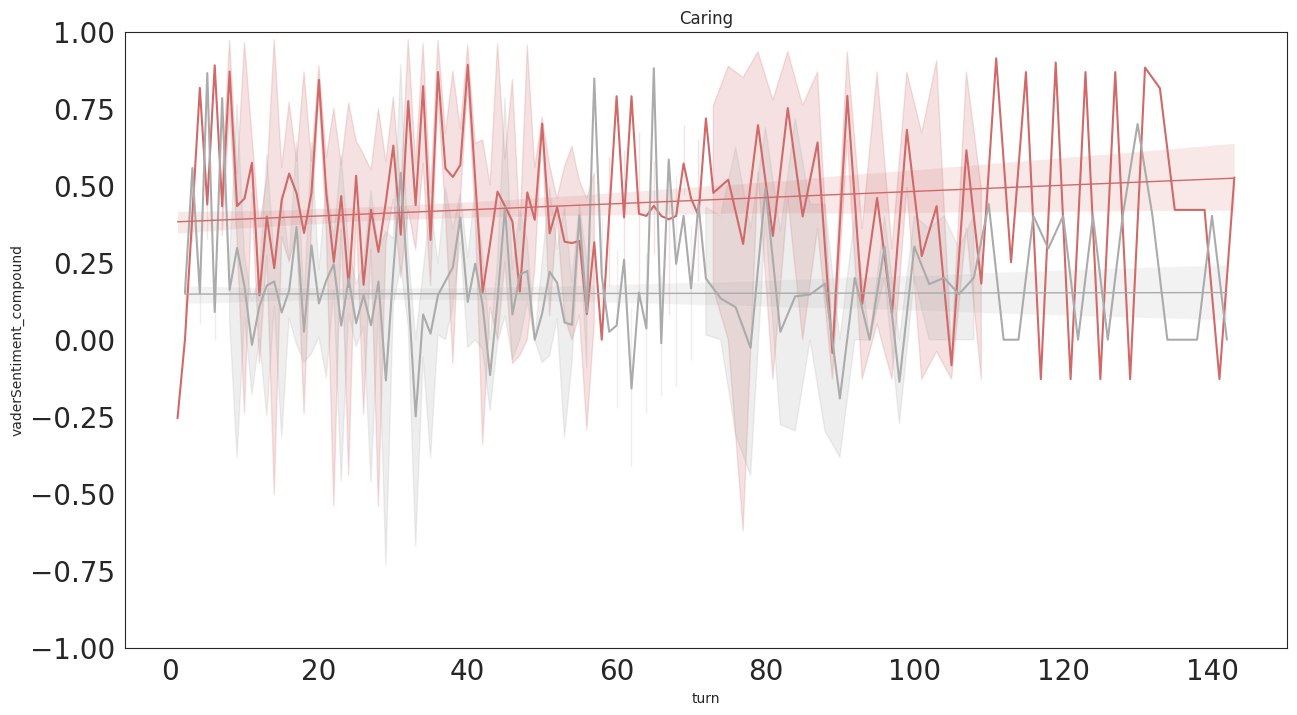

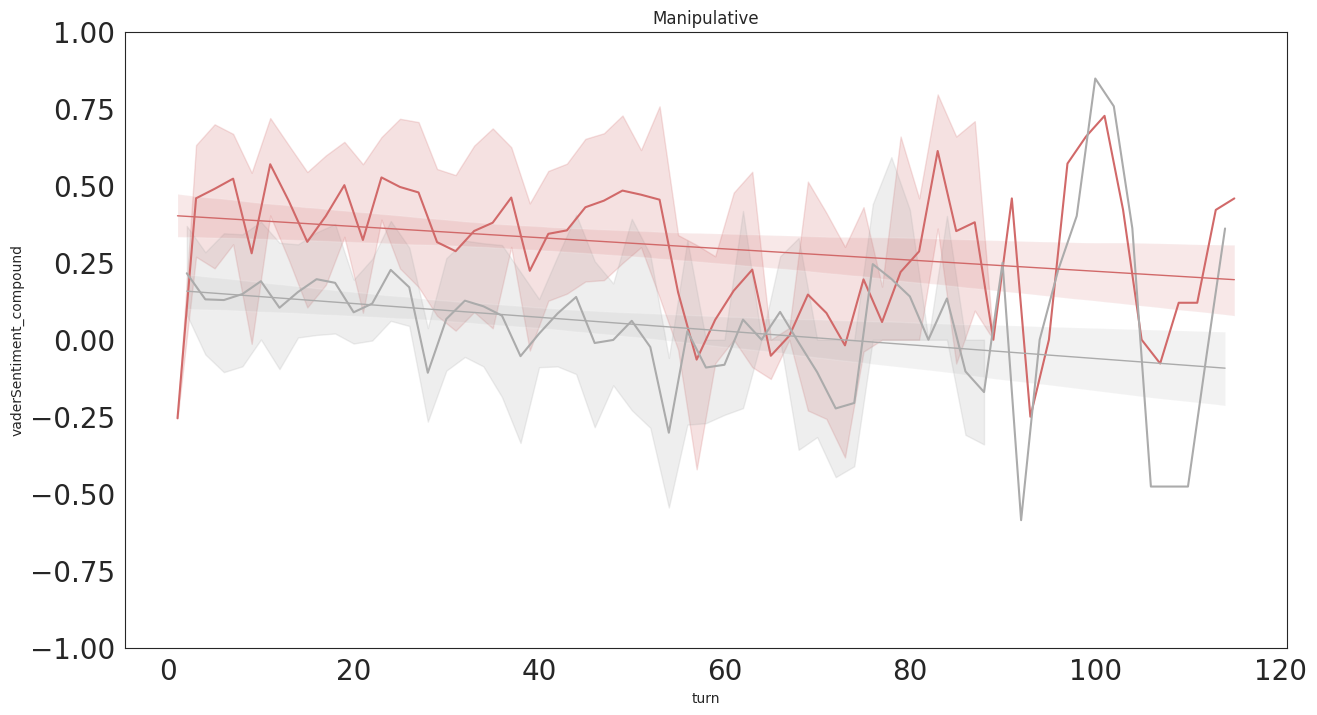

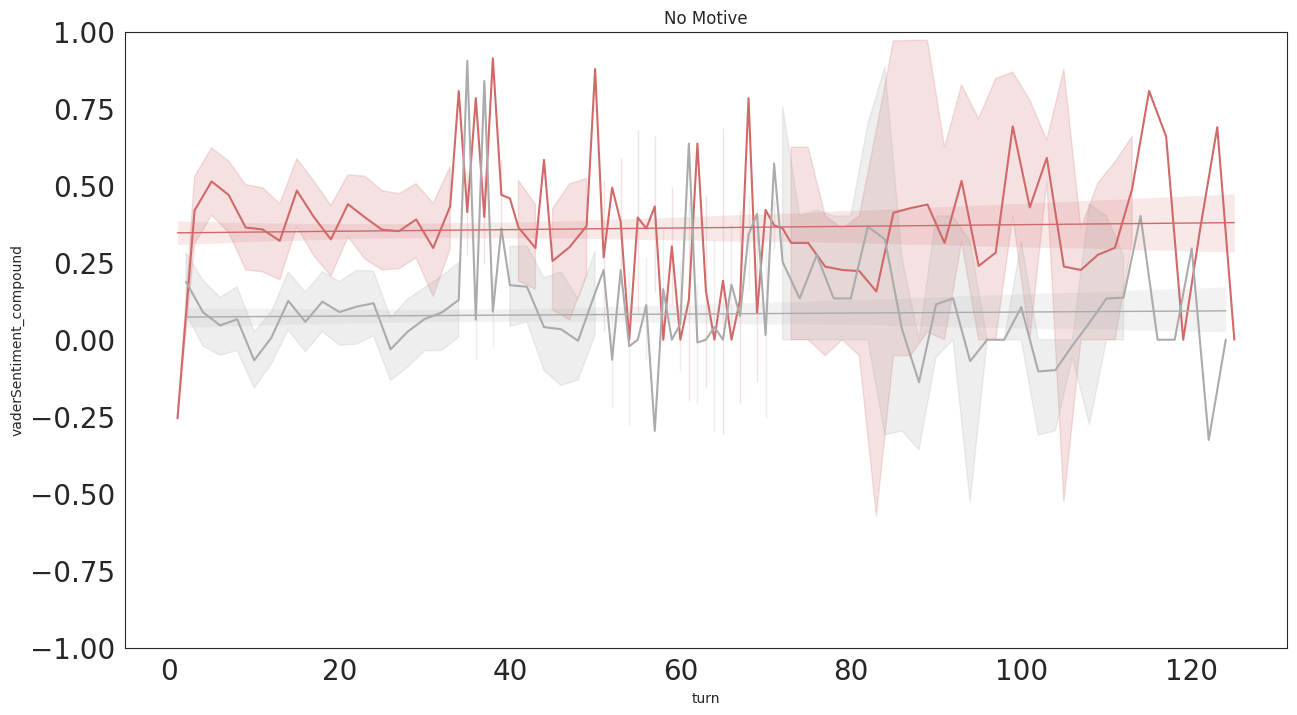

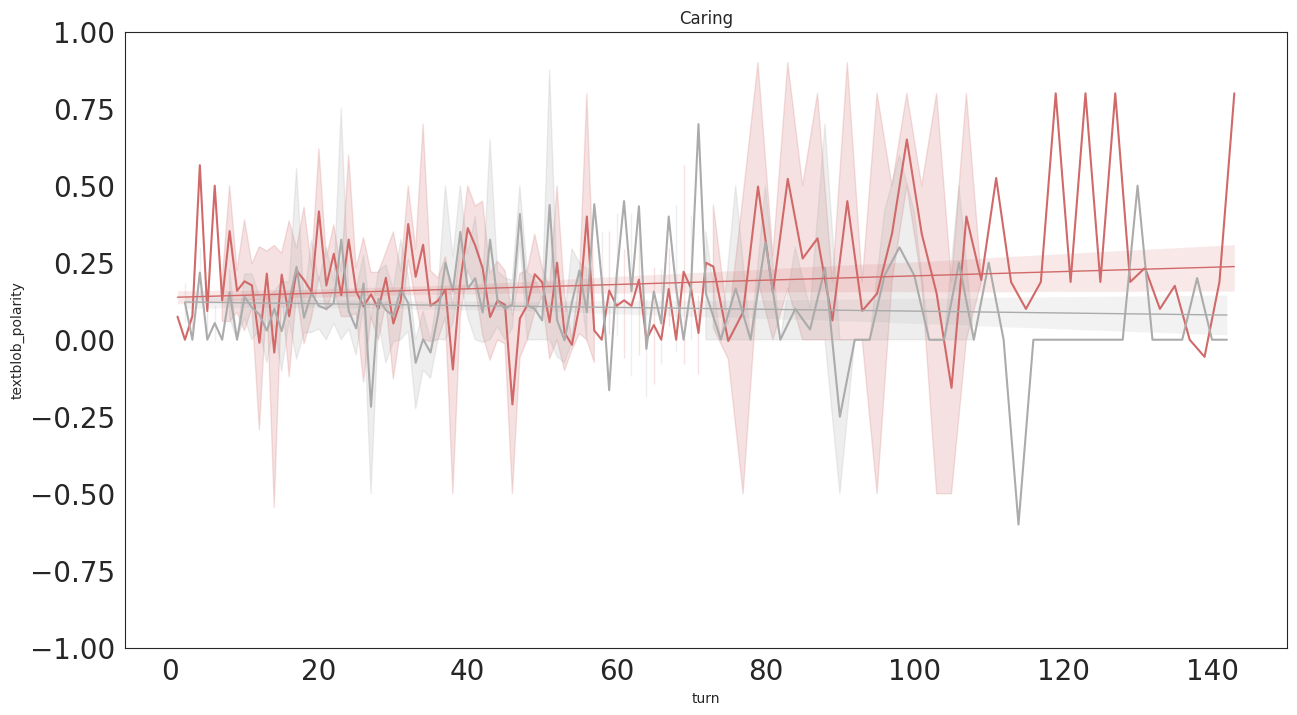

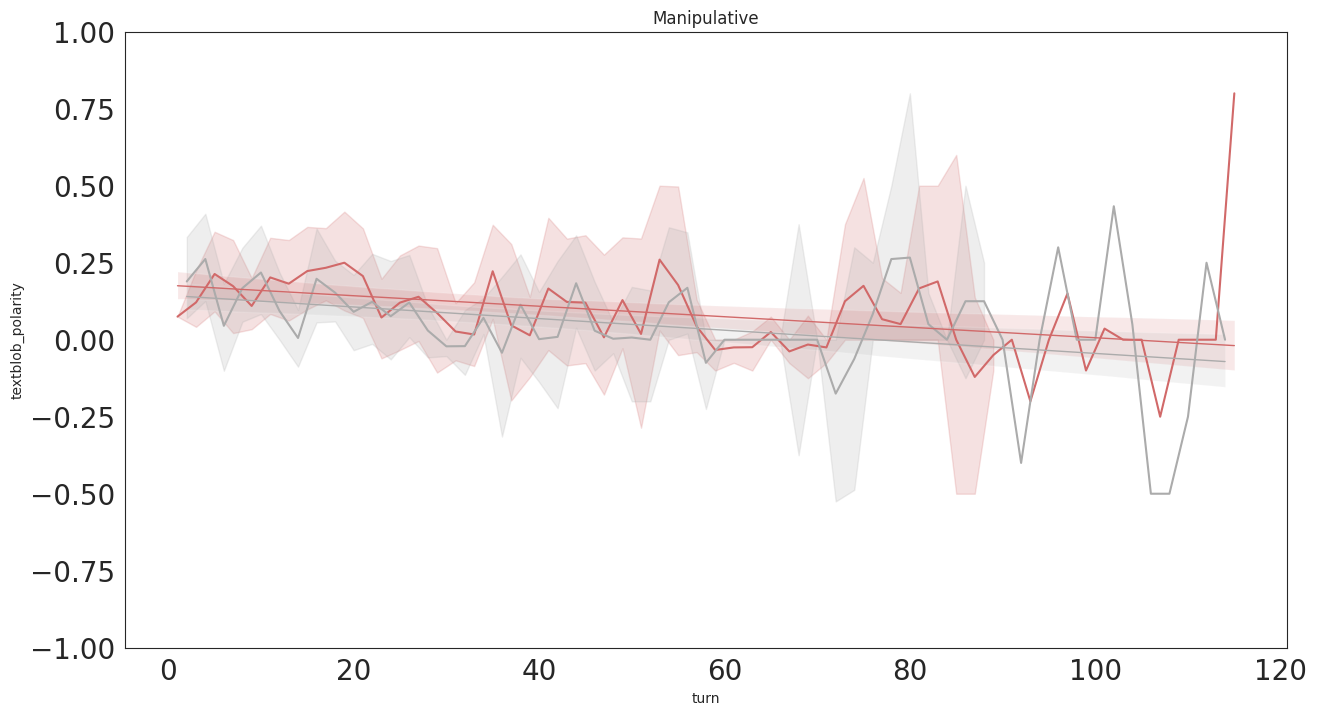

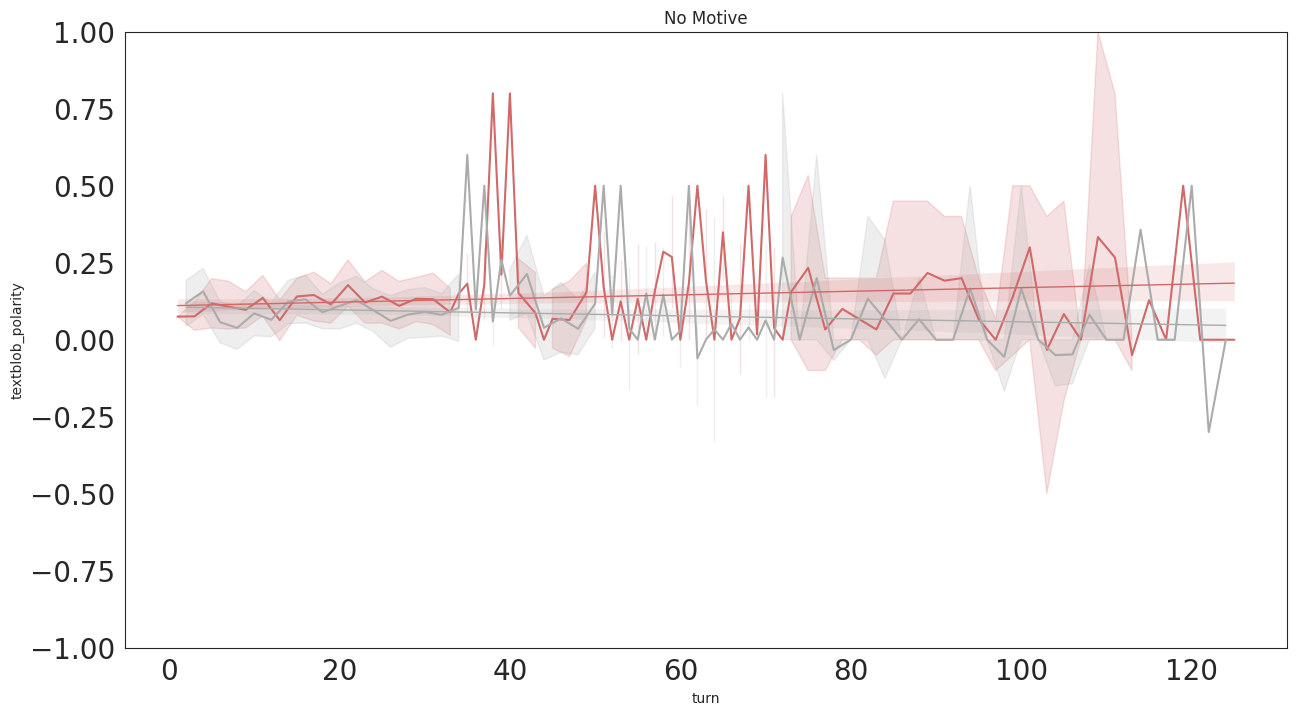

In [ ]:
# PERCEIVED - GPT

ylist = ["vaderSentiment_compound", "textblob_polarity"]

for y in ylist: 
    for item in prc_datalist: 
        x = "turn"
        hue = "convo_agent"
        hue_order=['AI', 'Human']
        my_pal = {"AI": "#d16969", "Human": "#ababab"}
        dataf = item[0]
        name = item[1]
        plt.rc('xtick', labelsize=20) 
        plt.rc('ytick', labelsize=20) 
        plt.figure(figsize = (15,8))
        plt.ylim(-1,1)
        ax = sns.lineplot(data=dataf, x=x, y=y,  hue=hue, hue_order=hue_order, palette=my_pal)
        ax.set_title(name)
        ax.get_legend().remove()
        sns.regplot(x=x, y=y, data=dataf[dataf['convo_agent']=='AI'], 
            fit_reg=True, ax=ax, scatter=False, line_kws={'linewidth':1, "color": "#d16969"})
        sns.regplot(x=x, y=y, data=dataf[dataf['convo_agent']=='Human'], 
            fit_reg=True, ax=ax, scatter=False, line_kws={'linewidth':1, "color": "#ababab"})

    

In [ ]:
# PERCEIVED - GPT - stat values

ylist = ["vaderSentiment_compound"]

for y in ylist: 
    for item in prc_datalist: 
        dataf = item[0]
        name = item[1]
        print(name)
        
        for speaker in ['AI', 'Human']:
            x = dataf[dataf['convo_agent']==speaker]["turn"]
            yi = dataf[dataf['convo_agent']==speaker][y]
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

            print(speaker + ": " + "slope = $" + str(slope) + 
                " \pm " + str(std_err) + "$, r = " + str(r_value) + ", p = " + str(p_value))

        #x = dataf["turn"]
        #yi = dataf[y]
        #slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

        #print("Slope: " + str(slope) + ", r value: " + str(r_value) + ", p-value: " + str(p_value) + ", std err: " + str(std_err))

Caring
AI: slope = $0.000997350857049028 \pm 0.0005288127119202728$, r = 0.04672090984220876, p = 0.059470478135454814
Human: slope = $3.466390084493007e-05 \pm 0.0004491981131046224$, r = 0.001965153526270404, p = 0.9384995889111849
Manipulative
AI: slope = $-0.0018189988391196625 \pm 0.0008130887125646896$, r = -0.10994912764172267, p = 0.02581480380184051
Human: slope = $-0.0022324011772293234 \pm 0.0006886429111816401$, r = -0.16138070735121798, p = 0.001289377410673841
No Motive
AI: slope = $0.00026704003065433006 \pm 0.0005689108687094742$, r = 0.012411682731659499, p = 0.6388637626594704
Human: slope = $0.00016477637829139674 \pm 0.00048531908657641916$, r = 0.009189310333154035, p = 0.7342689565129852


In [ ]:
# PERCEIVED - GPT - stat values - textBlob

ylist = ["textblob_polarity"]

for y in ylist: 
    for item in prc_datalist: 
        dataf = item[0]
        name = item[1]
        print(name)
        
        for speaker in ['AI', 'Human']:
            x = dataf[dataf['convo_agent']==speaker]["turn"]
            yi = dataf[dataf['convo_agent']==speaker][y]
            slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(x, yi)

            print(speaker + ": " + "slope = $" + str(slope) + 
                " \pm " + str(std_err) + "$, r = " + str(r_value) + ", p = " + str(p_value))

Caring
AI: slope = $0.0007002546520130103 \pm 0.0003388497075845816$, r = 0.051182209190731985, p = 0.03893325170355209
Human: slope = $-0.0003014465403927151 \pm 0.0003222111388236519$, r = -0.023817948166936904, p = 0.3496483630451662
Manipulative
AI: slope = $-0.0017046581917006705 \pm 0.0005263559612602476$, r = -0.1581239691908675, p = 0.001299176552111098
Human: slope = $-0.0018854376793910447 \pm 0.0005138569049872263$, r = -0.18199502115092797, p = 0.0002768750803634956
No Motive
AI: slope = $0.0005874852954590113 \pm 0.0003387102770226611$, r = 0.045818857624270716, p = 0.0830489107040804
Human: slope = $-0.0004841985942161375 \pm 0.00034557821273432975$, r = -0.03789647068211566, p = 0.16140372418734503


<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=1f3ea62d-9e62-461e-8c65-1caf654509ee' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>